# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
api_key = "a273098de036bf2627421c2729be5830"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# make dataframe and column categories

column_names = ("City Name", "Country Code", "Latitude", "Longitude", "Temperature",
            "Humidity","Cloudiness","Wind Speed")
cities_df = pd.DataFrame(columns = column_names)
cities_df

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed


In [9]:
# perform API call

api_key = "a273098de036bf2627421c2729be5830"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

units = "Imperial"
query_url = url + "&units=" + units + "&q="

In [10]:
# get weather data and print processing log
searchcount = 0
search_data = []
city_list = []
country_list = []

print("Getting API weather data")
print("----")

for city in cities: 
    try:
        print(f"Getting record {searchcount} for the city: {city}")
        searchcount += 1
        response = requests.get(query_url + city)
        datapull = response.json()
        country = datapull['sys']['country']
        searchcityID = datapull['id']
        search_data.append(datapull)
        city_list.append(city)
        country_list.append(country)
        print(f"Record found for city: {city} with city id: {searchcityID}")
    except Exception as ex:
        print(f"No record found for city: {city}")
        pass

print("End")

Getting API weather data
----
Getting record 0 for the city: rikitea
Record found for city: rikitea with city id: 4030556
Getting record 1 for the city: prainha
Record found for city: prainha with city id: 3391287
Getting record 2 for the city: lompoc
Record found for city: lompoc with city id: 5367788
Getting record 3 for the city: attawapiskat
No record found for city: attawapiskat
Getting record 4 for the city: meadow lake
Record found for city: meadow lake with city id: 5478673
Getting record 5 for the city: hermanus
Record found for city: hermanus with city id: 3366880
Getting record 6 for the city: halifax
Record found for city: halifax with city id: 6324729
Getting record 7 for the city: benjamin hill
Record found for city: benjamin hill with city id: 4017152
Getting record 8 for the city: ankola
Record found for city: ankola with city id: 1278551
Getting record 9 for the city: vila velha
Record found for city: vila velha with city id: 3445026
Getting record 10 for the city: cap

Record found for city: saint george with city id: 5546220
Getting record 88 for the city: hirara
Record found for city: hirara with city id: 1862505
Getting record 89 for the city: hithadhoo
Record found for city: hithadhoo with city id: 1282256
Getting record 90 for the city: ilulissat
Record found for city: ilulissat with city id: 3423146
Getting record 91 for the city: kavaratti
Record found for city: kavaratti with city id: 1267390
Getting record 92 for the city: punta arenas
Record found for city: punta arenas with city id: 3874787
Getting record 93 for the city: sentyabrskiy
No record found for city: sentyabrskiy
Getting record 94 for the city: sohag
Record found for city: sohag with city id: 347796
Getting record 95 for the city: oranjemund
Record found for city: oranjemund with city id: 3354071
Getting record 96 for the city: assiniboia
Record found for city: assiniboia with city id: 5887798
Getting record 97 for the city: nicolas bravo
Record found for city: nicolas bravo with

Record found for city: touba with city id: 2280376
Getting record 176 for the city: giyon
Record found for city: giyon with city id: 336372
Getting record 177 for the city: minas novas
Record found for city: minas novas with city id: 3457152
Getting record 178 for the city: westport
Record found for city: westport with city id: 4845585
Getting record 179 for the city: puerto ayora
Record found for city: puerto ayora with city id: 3652764
Getting record 180 for the city: port-gentil
Record found for city: port-gentil with city id: 2396518
Getting record 181 for the city: mangochi
Record found for city: mangochi with city id: 927246
Getting record 182 for the city: auki
Record found for city: auki with city id: 2109701
Getting record 183 for the city: hanmer springs
Record found for city: hanmer springs with city id: 2190299
Getting record 184 for the city: katsuura
Record found for city: katsuura with city id: 2112309
Getting record 185 for the city: bargal
No record found for city: bar

Record found for city: broome with city id: 5110365
Getting record 264 for the city: pisco
Record found for city: pisco with city id: 3932145
Getting record 265 for the city: warqla
No record found for city: warqla
Getting record 266 for the city: faanui
Record found for city: faanui with city id: 4034551
Getting record 267 for the city: samarai
Record found for city: samarai with city id: 2132606
Getting record 268 for the city: autazes
Record found for city: autazes with city id: 3406948
Getting record 269 for the city: wampusirpi
No record found for city: wampusirpi
Getting record 270 for the city: morro bay
Record found for city: morro bay with city id: 5374920
Getting record 271 for the city: hukuntsi
Record found for city: hukuntsi with city id: 933726
Getting record 272 for the city: gamba
Record found for city: gamba with city id: 2400547
Getting record 273 for the city: uyuni
Record found for city: uyuni with city id: 3901903
Getting record 274 for the city: coahuayana
Record 

Record found for city: abnub with city id: 362973
Getting record 351 for the city: harper
Record found for city: harper with city id: 2276492
Getting record 352 for the city: andenes
Record found for city: andenes with city id: 3163146
Getting record 353 for the city: port hedland
Record found for city: port hedland with city id: 2063042
Getting record 354 for the city: karaul
No record found for city: karaul
Getting record 355 for the city: kaduna
Record found for city: kaduna with city id: 2335727
Getting record 356 for the city: miraflores
Record found for city: miraflores with city id: 3761194
Getting record 357 for the city: lac-megantic
Record found for city: lac-megantic with city id: 6032673
Getting record 358 for the city: moose factory
Record found for city: moose factory with city id: 6078372
Getting record 359 for the city: galdar
Record found for city: galdar with city id: 2517436
Getting record 360 for the city: college
Record found for city: college with city id: 5859699

Record found for city: talaya with city id: 2120769
Getting record 438 for the city: nyurba
Record found for city: nyurba with city id: 2018735
Getting record 439 for the city: xuanzhou
Record found for city: xuanzhou with city id: 1788081
Getting record 440 for the city: smoky lake
Record found for city: smoky lake with city id: 6150293
Getting record 441 for the city: mwense
Record found for city: mwense with city id: 902721
Getting record 442 for the city: ayagoz
Record found for city: ayagoz with city id: 1525988
Getting record 443 for the city: sorong
Record found for city: sorong with city id: 1626542
Getting record 444 for the city: tessalit
Record found for city: tessalit with city id: 2449893
Getting record 445 for the city: santo domingo
Record found for city: santo domingo with city id: 3492908
Getting record 446 for the city: puerto colombia
Record found for city: puerto colombia with city id: 3671497
Getting record 447 for the city: bassila
Record found for city: bassila w

Record found for city: albemarle with city id: 4452303
Getting record 526 for the city: glens falls
Record found for city: glens falls with city id: 5118693
Getting record 527 for the city: trzebinia
Record found for city: trzebinia with city id: 3083111
Getting record 528 for the city: dongsheng
Record found for city: dongsheng with city id: 1812256
Getting record 529 for the city: tashara
Record found for city: tashara with city id: 1490054
Getting record 530 for the city: schweinfurt
Record found for city: schweinfurt with city id: 2834498
Getting record 531 for the city: port shepstone
Record found for city: port shepstone with city id: 964406
Getting record 532 for the city: utiroa
No record found for city: utiroa
Getting record 533 for the city: kegums
Record found for city: kegums with city id: 458892
Getting record 534 for the city: kot samaba
Record found for city: kot samaba with city id: 1172888
Getting record 535 for the city: la primavera
Record found for city: la primaver

No record found for city: karamea
Getting record 613 for the city: karratha
Record found for city: karratha with city id: 6620339
Getting record 614 for the city: hauterive
Record found for city: hauterive with city id: 3013748
Getting record 615 for the city: sechura
Record found for city: sechura with city id: 3691954
Getting record 616 for the city: grootfontein
Record found for city: grootfontein with city id: 3357114
Getting record 617 for the city: mentougou
Record found for city: mentougou with city id: 1800657
Getting record 618 for the city: lensk
Record found for city: lensk with city id: 2020838
End


In [11]:
len(search_data)

562

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# get data for each weather category
latitude = [data.get("coord").get("lat") for data in search_data]
longitude = [data.get("coord").get("lon") for data in search_data]
temperature = [data.get("main").get("temp") for data in search_data]
humidity = [data.get("main").get("humidity") for data in search_data]
clouds = [data.get("clouds").get("all") for data in search_data]
wind = [data.get("wind").get("speed") for data in search_data]

In [13]:
weather_df = pd.DataFrame({"City Name":city_list,
                          "Country":country_list,
                          "Latitude":latitude,
                          "Longitude":longitude,
                          "Temperature":temperature,
                          "Humidity":humidity,
                          "Cloudiness":clouds,
                          "Winds":wind})
weather_df.head()

,City Name,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Winds
0,rikitea,PF,-23.12,-134.97,73.45,84,100,6.69
1,prainha,BR,-1.80,-53.48,87.01,57,1,5.82
2,lompoc,US,34.64,-120.46,56.64,87,90,2.91
3,meadow lake,US,34.80,-106.54,71.96,38,90,6.93
4,hermanus,ZA,-34.42,19.23,68.00,55,69,5.44


In [14]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City Name    562 non-null    object 
 1   Country      562 non-null    object 
 2   Latitude     562 non-null    float64
 3   Longitude    562 non-null    float64
 4   Temperature  562 non-null    float64
 5   Humidity     562 non-null    int64  
 6   Cloudiness   562 non-null    int64  
 7   Winds        562 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 35.2+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Winds
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,20.379733,14.190178,70.326157,67.000000,52.516014,8.076174
std,32.854525,90.308267,14.865188,22.589809,37.710842,5.858772
min,-54.800000,-179.170000,28.200000,6.000000,0.000000,0.090000
25%,-6.347500,-65.557500,60.252500,53.000000,14.000000,4.415000
50%,24.695000,18.675000,72.005000,72.000000,62.000000,7.000000
75%,47.937500,92.430000,80.600000,84.000000,90.000000,10.672500
max,78.220000,179.320000,110.300000,100.000000,100.000000,85.230000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The warmest temperatures range from about 20 degrees north to about 35 degrees north.


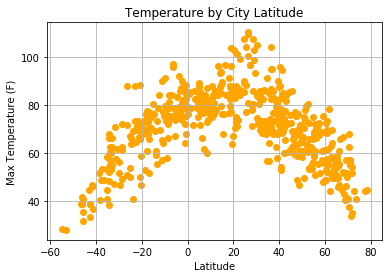

In [17]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o", color="orange")

plt.title("Temperature by City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatTemp_plot.png")

print(f"The warmest temperatures range from about 20 degrees north to about 35 degrees north.")

plt.show()

## Latitude vs. Humidity Plot

There are more cities in the northern hemisphere in this sample. Humidity seems to have no relevance in relation to latitude.


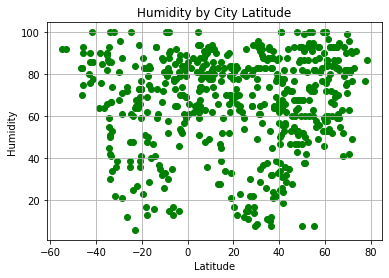

In [18]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", color="green")

plt.title("Humidity by City Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatHum_plot.png")

print(f"There are more cities in the northern hemisphere in this sample. Humidity seems to have no relevance in relation to latitude.")

plt.show()

## Latitude vs. Cloudiness Plot

There few cities with zero or low cloudiness near the equator. There are many cities with high levels of cloudiness near the equator.


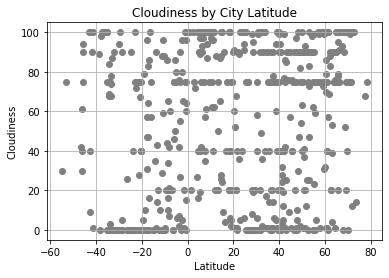

In [19]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", color="gray")

plt.title("Cloudiness by City Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatCloud_plot.png")

print(f"There few cities with zero or low cloudiness near the equator. There are many cities with high levels of cloudiness near the equator.")

plt.show()

## Latitude vs. Wind Speed Plot

I don't see any clear correlation in wind speed and latitude. There is one huge outlier.


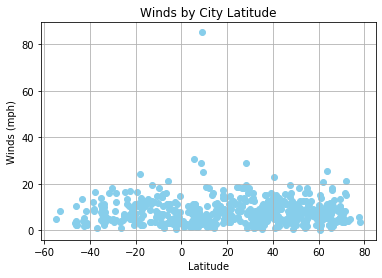

In [21]:
plt.scatter(weather_df["Latitude"], weather_df["Winds"], marker="o", color="skyblue")

plt.title("Winds by City Latitude")
plt.ylabel("Winds (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("LatWind_plot.png")

print(f"I don't see any clear correlation in wind speed and latitude. There is one huge outlier.")

plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]
northern_df.head()
northern_df.info()
southern_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 2 to 561
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City Name    388 non-null    object 
 1   Country      388 non-null    object 
 2   Latitude     388 non-null    float64
 3   Longitude    388 non-null    float64
 4   Temperature  388 non-null    float64
 5   Humidity     388 non-null    int64  
 6   Cloudiness   388 non-null    int64  
 7   Winds        388 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 27.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 559
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City Name    174 non-null    object 
 1   Country      174 non-null    object 
 2   Latitude     174 non-null    float64
 3   Longitude    174 non-null    float64
 4   Temperature  174 non-null    float64
 5   Humidity  

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.51x + 91.95
r-square value: -0.7076719921749252
The regression displays a negative correlation.
The temperature tends to increase nearing the equator.


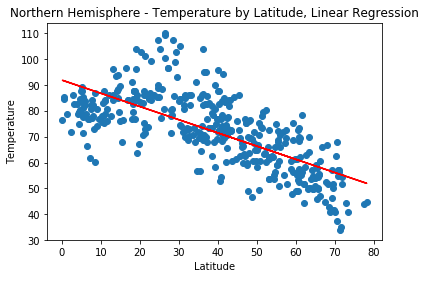

In [23]:
x = pd.to_numeric(northern_df["Latitude"]).astype(float)
y = pd.to_numeric(northern_df["Temperature"]).astype(float)
(slope, intercept,rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere - Temperature by Latitude, Linear Regression")
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
print(line_eq)
print(f"r-square value: {rvalue}")
print(f"The regression displays a negative correlation.")
print(f"The temperature tends to increase nearing the equator.")
plt.savefig("North_TempLat_plot.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.9x + 84.51
r-square value: 0.8160893456540566
The regression displays a positive correlation.
The temperature tends to increase nearing the equator in a larger correlation than in the northern hemisphere.


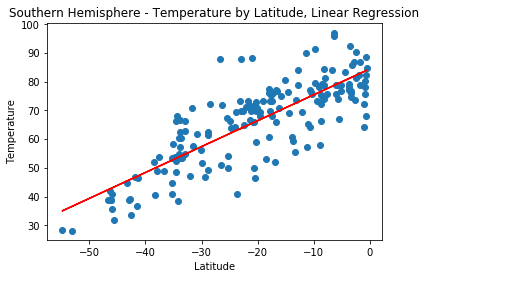

In [24]:
x = pd.to_numeric(southern_df["Latitude"]).astype(float)
y = pd.to_numeric(southern_df["Temperature"]).astype(float)
(slope, intercept,rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress,"r-")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere - Temperature by Latitude, Linear Regression")
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
print(line_eq)
print(f"r-square value: {rvalue}")
print(f"The regression displays a positive correlation.")
print(f"The temperature tends to increase nearing the equator in a larger correlation than in the northern hemisphere.")
plt.savefig("South_TempLat_plot.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.09x + 64.07
r-square value: 0.08027075471140195
The regression displays a barely positive correlation.
Latitude and humidity likely have no correlation.


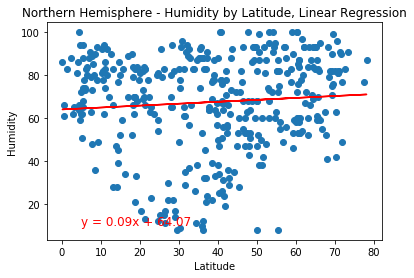

In [25]:
x = pd.to_numeric(northern_df["Latitude"]).astype(float)
y = pd.to_numeric(northern_df["Humidity"]).astype(float)
(slope, intercept,rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity by Latitude, Linear Regression")
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
print(line_eq)
print(f"r-square value: {rvalue}")
print(f"The regression displays a barely positive correlation.")
print(f"Latitude and humidity likely have no correlation.")
plt.savefig("North_HumLat_plot.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.19x + 61.98
r-square value: -0.11013152239734138
The regression displays a barely negative correlation.
Latitude and humidity likely have no correlation.


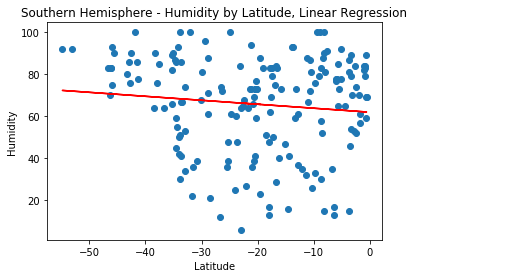

In [26]:
x = pd.to_numeric(southern_df["Latitude"]).astype(float)
y = pd.to_numeric(southern_df["Humidity"]).astype(float)
(slope, intercept,rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity by Latitude, Linear Regression")
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
print(line_eq)
print(f"r-square value: {rvalue}")
print(f"The regression displays a barely negative correlation.")
print(f"Latitude and humidity likely have no correlation.")
plt.savefig("South_HumLat_plot.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.04x + 55.58
r-square value: 0.02196339954115768
The regression displays a barely positive correlation.
Latitude and cloudiness have little or no correlation.


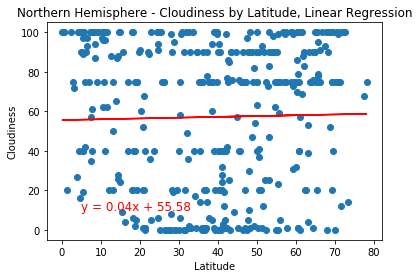

In [27]:
x = pd.to_numeric(northern_df["Latitude"]).astype(float)
y = pd.to_numeric(northern_df["Cloudiness"]).astype(float)
(slope, intercept,rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness by Latitude, Linear Regression")
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
print(line_eq)
print(f"r-square value: {rvalue}")
print(f"The regression displays a barely positive correlation.")
print(f"Latitude and cloudiness have little or no correlation.")
plt.savefig("North_CloudLat_plot.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.15x + 39.07
r-square value: -0.055269248286148036
The regression displays a barely negative correlation.
Latitude and cloudiness have little or no correlation.


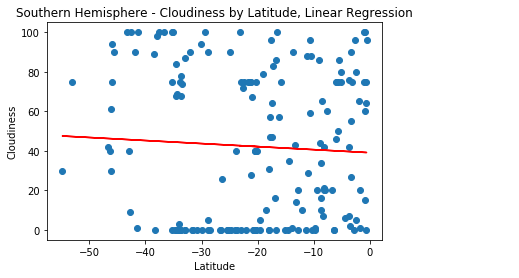

In [29]:
x = pd.to_numeric(southern_df["Latitude"]).astype(float)
y = pd.to_numeric(southern_df["Cloudiness"]).astype(float)
(slope, intercept,rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness by Latitude, Linear Regression")
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
print(line_eq)
print(f"r-square value: {rvalue}")
print(f"The regression displays a barely negative correlation.")
print(f"Latitude and cloudiness have little or no correlation.")
plt.savefig("South_CloudLat_plot.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.01x + 8.79
r-square value: -0.04403493938637477
The regression displays a barely negative correlation.
Latitude and wind have little or no correlation.


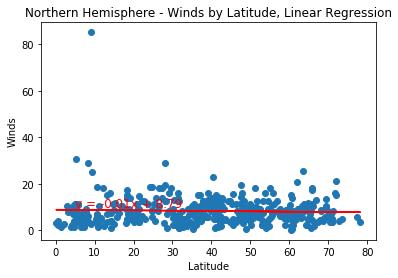

In [31]:
x = pd.to_numeric(northern_df["Latitude"]).astype(float)
y = pd.to_numeric(northern_df["Winds"]).astype(float)
(slope, intercept,rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress,"r-")
plt.xlabel("Latitude")
plt.ylabel("Winds")
plt.title("Northern Hemisphere - Winds by Latitude, Linear Regression")
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
print(line_eq)
print(f"r-square value: {rvalue}")
print(f"The regression displays a barely negative correlation.")
print(f"Latitude and wind have little or no correlation.")
plt.savefig("North_WindLat_plot.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x + 8.37
r-square value: 0.09943011772938133
The regression displays a barely positive correlation.
Latitude and wind have little or no correlation.


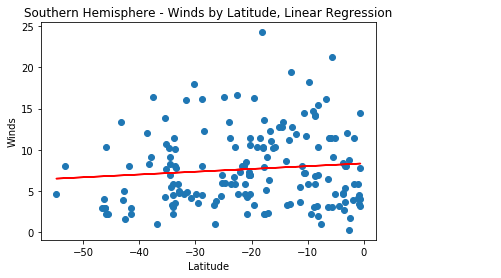

In [33]:
x = pd.to_numeric(southern_df["Latitude"]).astype(float)
y = pd.to_numeric(southern_df["Winds"]).astype(float)
(slope, intercept,rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress,"r-")
plt.xlabel("Latitude")
plt.ylabel("Winds")
plt.title("Southern Hemisphere - Winds by Latitude, Linear Regression")
plt.annotate(line_eq,(5,10),fontsize=12,color="red")
print(line_eq)
print(f"r-square value: {rvalue}")
print(f"The regression displays a barely positive correlation.")
print(f"Latitude and wind have little or no correlation.")
plt.savefig("South_WindLat_plot.png")
plt.show()

In [34]:
# export df to csv file
weather_df.to_csv("weather_df.csv")